<a href="https://colab.research.google.com/github/Lingesh077/-github1/blob/main/language%20detection%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load multilingual dataset
dataset = load_dataset("papluca/language-identification")
df = pd.DataFrame(dataset["train"])  # Convert to Pandas DataFrame


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.99k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

valid.csv:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/1.69M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/70000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [4]:
# Check available columns
print("Dataset Columns:", df.columns)
print(df.head())


Dataset Columns: Index(['labels', 'text'], dtype='object')
  labels                                               text
0     pt  os chefes de defesa da estónia, letónia, lituâ...
1     bg  размерът на хоризонталната мрежа може да бъде ...
2     zh  很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3     th  สำหรับ ของเก่า ที่ จริงจัง ลอง   honeychurch  ...
4     ru                             Он увеличил давление .


In [24]:
from langdetect import detect

texts = ["Bonjour, comment ça va?", "Hola, cómo estás?", "இலக்குகளை அமைத்தல்: ஒரு நாளைக்கு 50 வார்த்தைகள்."]
for text in texts:
    print(f"'{text}' → Predicted Language: {detect(text)}")


'Bonjour, comment ça va?' → Predicted Language: fr
'Hola, cómo estás?' → Predicted Language: es
'இலக்குகளை அமைத்தல்: ஒரு நாளைக்கு 50 வார்த்தைகள்.' → Predicted Language: ta


In [21]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=b372a4ac2ad9d7997ee3a3f66d8def972687cd5df4ebd763d5525ba47bdc489e
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [12]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)


In [13]:
# Text Vectorization (Convert text to numerical features)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [14]:
# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [15]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [16]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

          ar       1.00      0.95      0.98       716
          bg       0.99      0.95      0.97       702
          de       1.00      0.98      0.99       722
          el       1.00      0.98      0.99       732
          en       0.98      0.98      0.98       748
          es       0.99      0.98      0.99       696
          fr       1.00      0.99      0.99       706
          hi       1.00      0.96      0.98       694
          it       0.99      0.97      0.98       681
          ja       0.73      0.07      0.13       650
          nl       0.98      0.95      0.97       724
          pl       0.95      0.85      0.90       681
          pt       0.98      0.96      0.97       728
          ru       0.98      0.91      0.95       693
          sw       0.99      0.93      0.96       682
          th       1.00      0.97      0.99       683
          tr       0.99      0.92      0.96       744
          ur

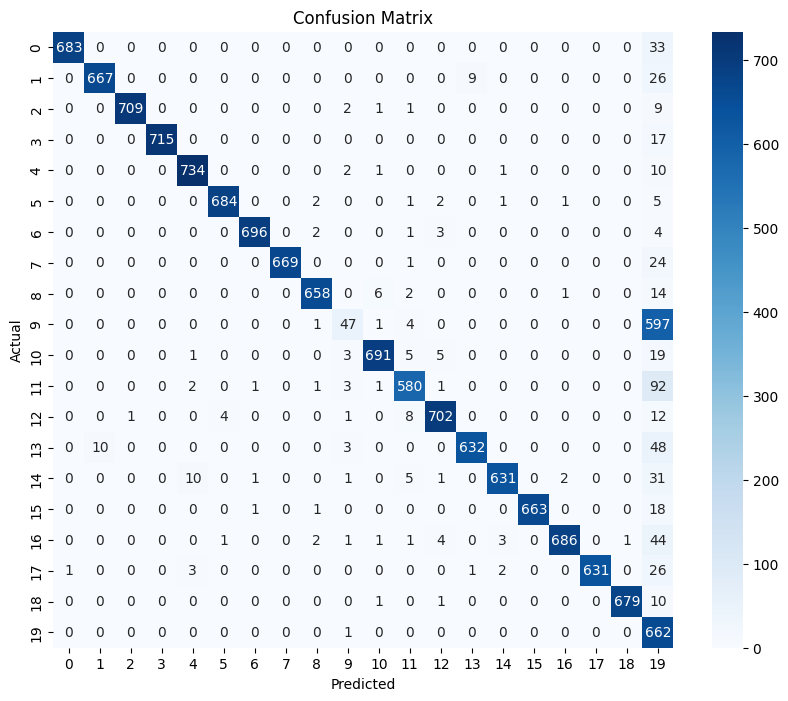

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Test with Sample Text
sample_text = ["Bonjour, comment ça va?", "Hola, cómo estás?", "Hello, how are you?"]
sample_tfidf = vectorizer.transform(sample_text)
predicted_languages = model.predict(sample_tfidf)


In [19]:
for text, lang in zip(sample_text, predicted_languages):
    print(f"'{text}' → Predicted Language: {lang}")


'Bonjour, comment ça va?' → Predicted Language: zh
'Hola, cómo estás?' → Predicted Language: zh
'Hello, how are you?' → Predicted Language: zh


In [8]:
print(df.columns)


Index(['labels', 'text'], dtype='object')


In [9]:
df = df.rename(columns={'labels': 'label'})


In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.6 MB/s eta 0:00:00
